<a href="https://colab.research.google.com/github/yashi4/hate-speech-detection/blob/main/Hate_speech_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy scikit-learn nltk matplotlib


In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for heatmap

# Download NLTK stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
# Sample dataset: Hate Speech and Offensive Language
data_dict = {
    'id': [1, 2, 3, 4, 5, 6, 7, 8],
    'tweet': [
        "I hate you!",
        "You are the worst!",
        "I love this!",
        "You are amazing!",
        "Shut up!",
        "You're an idiot.",
        "Such a great day!",
        "Hate will not win."
    ],
    'class': [1, 1, 0, 0, 1, 1, 0, 0]  # 1: Hate Speech, 0: Non-Hate Speech
}

# Create a DataFrame from the dictionary
data = pd.DataFrame(data_dict)

# Step 1: Data Preprocessing (Cleaning the text)
def clean_text(text):
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Convert to lowercase
    text = text.lower()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text

# Apply the cleaning function to the text column
data['cleaned_text'] = data['tweet'].apply(clean_text)



In [21]:
# Step 2: Feature Extraction with TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Limiting features to top 5000
X = tfidf.fit_transform(data['cleaned_text']).toarray()  # Convert text into numerical features
y = data['class']  # Target labels (1: hate speech, 0: non-hate speech)



In [22]:
# Step 3: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [23]:
# Step 4: Train a Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter to avoid convergence warnings
log_reg.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = log_reg.predict(X_test)



In [24]:
# Step 6: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report (Precision, Recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))




Accuracy: 0.00
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

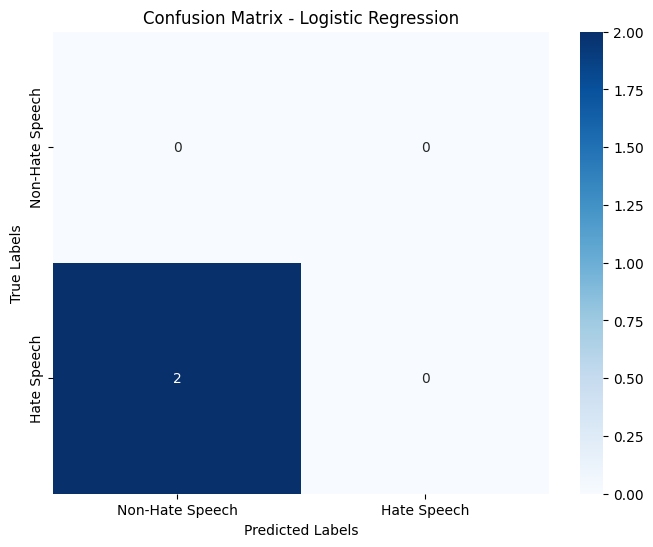

In [25]:
# Step 7: Plot Confusion Matrix using seaborn
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Hate Speech', 'Hate Speech'], yticklabels=['Non-Hate Speech', 'Hate Speech'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()